In [47]:
import tensorflow as tf
from keras import layers, models
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Buil/Compile NN model

In [48]:

input_shape = 300
output_shape = 6
model = models.Sequential()
model.add(layers.Dense(500, activation='tanh', input_shape=(300,)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(250, activation='tanh'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(output_shape, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Load Data

In [50]:
X_train = np.load('Data/Vectors/X_train.npy')
Y_train = np.load('Data/Vectors/Y_train.npy')[:, [0, 1, 2, 3, 4, 5]]
X_test = np.load('Data/Vectors/X_test.npy')
Y_test = np.load('Data/Vectors/Y_test.npy')[:, [0, 1, 2, 3, 4, 5]]
X_validation = np.load('Data/Vectors/X_validate.npy')
Y_validation = np.load('Data/Vectors/Y_validate.npy')[:, [0, 1, 2, 3, 4, 5]]


X_train_Tune = np.load('Data/VectorsPopRock/X_train.npy')
Y_train_Tune = np.load('Data/VectorsPopRock/Y_train.npy')[:, [0, 1, 2, 3, 4, 5]]
X_test_Tune = np.load('Data/VectorsPopRock/X_test.npy')
Y_test_Tune = np.load('Data/VectorsPopRock/Y_test.npy')[:, [0, 1, 2, 3, 4, 5]]
X_validation_Tune = np.load('Data/VectorsPopRock/X_validate.npy')
Y_validation_Tune = np.load('Data/VectorsPopRock/Y_validate.npy')[:, [0, 1, 2, 3, 4, 5]]

# Train

In [51]:
if False:
    model = tf.keras.models.load_model('my_model')

Epoch 1/5
10000/10000 [==============================] - 27s 3ms/step - loss: 0.6592 - accuracy: 0.6093 - val_loss: 0.6459 - val_accuracy: 0.6266
Epoch 2/5
10000/10000 [==============================] - 27s 3ms/step - loss: 0.6517 - accuracy: 0.6185 - val_loss: 0.6489 - val_accuracy: 0.6222
Epoch 3/5
10000/10000 [==============================] - 29s 3ms/step - loss: 0.6506 - accuracy: 0.6190 - val_loss: 0.6516 - val_accuracy: 0.6168
Epoch 4/5
10000/10000 [==============================] - 29s 3ms/step - loss: 0.6491 - accuracy: 0.6217 - val_loss: 0.6419 - val_accuracy: 0.6297
Epoch 5/5
10000/10000 [==============================] - 29s 3ms/step - loss: 0.6482 - accuracy: 0.6219 - val_loss: 0.6465 - val_accuracy: 0.6206


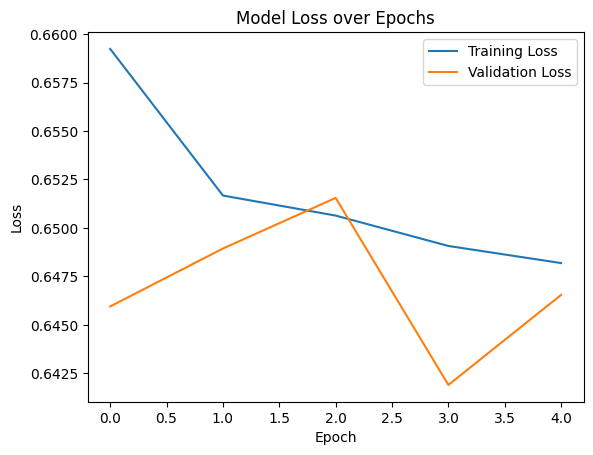

In [52]:
history =  model.fit(X_train_Tune, Y_train_Tune, epochs=5, batch_size=32, validation_data=(X_validation_Tune, Y_validation_Tune)) 
# Plotting the training and validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# Adding title and labels to the plot
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/5
7500/7500 [==============================] - 21s 3ms/step - loss: 1.4546 - accuracy: 0.5380 - val_loss: 1.0450 - val_accuracy: 0.5979
Epoch 2/5
7500/7500 [==============================] - 21s 3ms/step - loss: 1.0654 - accuracy: 0.5885 - val_loss: 1.0197 - val_accuracy: 0.6035
Epoch 3/5
7500/7500 [==============================] - 21s 3ms/step - loss: 1.0426 - accuracy: 0.5962 - val_loss: 1.0024 - val_accuracy: 0.6110
Epoch 4/5
7500/7500 [==============================] - 21s 3ms/step - loss: 1.0324 - accuracy: 0.5998 - val_loss: 1.0105 - val_accuracy: 0.6078
Epoch 5/5
7500/7500 [==============================] - 21s 3ms/step - loss: 1.0269 - accuracy: 0.6017 - val_loss: 1.0107 - val_accuracy: 0.6088


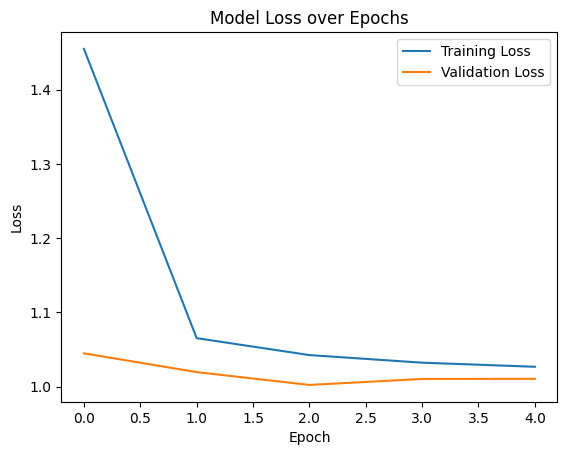

In [53]:
history = model.fit(X_train, Y_train, epochs=5, batch_size=32, validation_data=(X_validation, Y_validation))

# Plotting the training and validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# Adding title and labels to the plot
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [54]:
# Save the model
if False:
    model.save('my_model_61point5') 

# Evaluate

In [58]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

938/938 [==============================] - 1s 1ms/step - loss: 1.0269 - accuracy: 0.6057
Loss: 1.026910662651062, Accuracy: 0.605733335018158


# Confusion Matrix

938/938 [==============================] - 1s 1ms/step


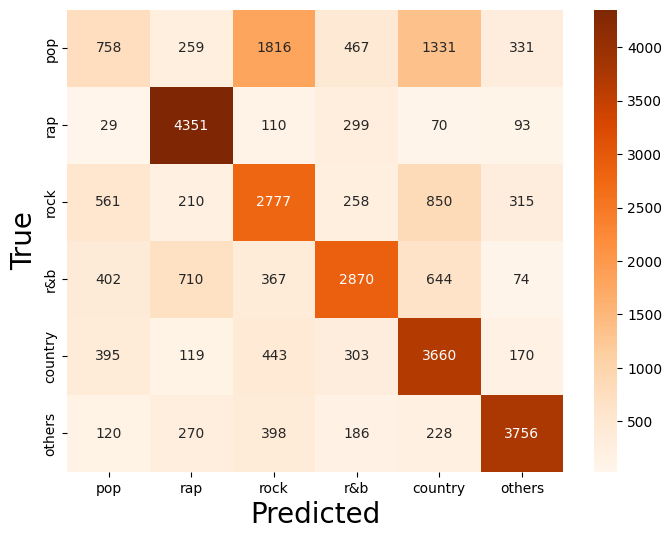

In [56]:

Y_pred = model.predict(X_test)


# Convert one-hot encoded vectors back to categorical values
Y_test_categorical = np.argmax(Y_test, axis=1)
Y_pred_categorical = np.argmax(Y_pred, axis=1)


# Create a confusion matrix
cm = confusion_matrix(Y_test_categorical, Y_pred_categorical)

# Visualize the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['pop','rap', 'rock', 'r&b', 'country' , 'others'], yticklabels=['pop','rap', 'rock', 'r&b', 'country', 'others'])
plt.ylabel('True', fontsize=20)
plt.xlabel('Predicted', fontsize=20)
plt.show()


Accuracy: 0.6057333333333333
Precision: [0.33465784 0.73509039 0.46980206 0.65480265 0.53958425 0.79257227]
Recall: [0.15276098 0.87863489 0.55864011 0.5664101  0.71905697 0.75756353]
F1-Score: [0.20976892 0.80047834 0.51038412 0.60740741 0.61652489 0.77467258]


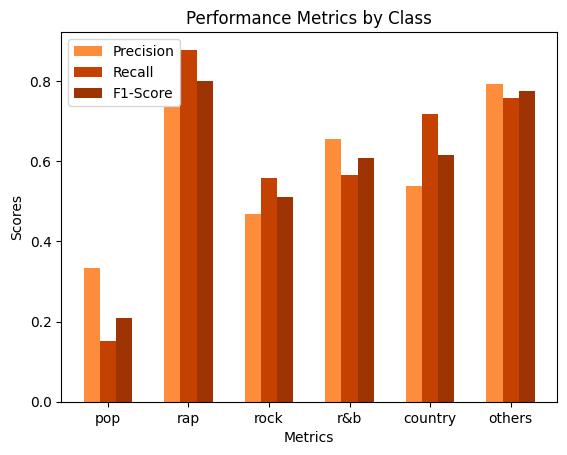

In [57]:
# Assuming you have predicted values stored in 'Y_pred_categorical' and true labels stored in 'Y_test_categorical'

# Accuracy
accuracy = accuracy_score(Y_test_categorical, Y_pred_categorical)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(Y_test_categorical, Y_pred_categorical, average=None)  # You can choose 'micro', 'macro', 'weighted', or 'samples' as per your requirement
print(f"Precision: {precision}")

# Recall
recall = recall_score(Y_test_categorical, Y_pred_categorical, average=None)  # You can choose 'micro', 'macro', 'weighted', or 'samples' as per your requirement
print(f"Recall: {recall}")

# F1-Score
f1 = f1_score(Y_test_categorical, Y_pred_categorical, average=None)  # You can choose 'micro', 'macro', 'weighted', or 'samples' as per your requirement
print(f"F1-Score: {f1}")



# Labels for the classes
classes = ['pop','rap', 'rock', 'r&b', 'country', 'others']

num_colors = 10

# Create the colormap
cmap = plt.get_cmap('Oranges')

# Generate the array of colors
colors = [cmap(i / num_colors) for i in range(num_colors)]

# Plotting Precision, Recall, and F1-Score
x = np.arange(len(classes))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision', color=colors[5])
rects2 = ax.bar(x, recall, width, label='Recall', color=colors[8])
rects3 = ax.bar(x + width, f1, width, label='F1-Score', color=colors[9])

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics by Class')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

plt.show()
